In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install mplfinance
import mplfinance as mpf

### Load the Data set

In [4]:
df1 = pd.read_csv(r"C:\Users\USER\Downloads\Raw_sales_data_2019_2024.csv")
df1.head()

,Date,Product_name,Total_Sales,Weather,Product_Cost,Sales_Price,Overhead_Costs,Promotion,Discount,Customer_Rating,Units_In_Stock,Lag_1
0,2019-01-04,cake,182067.0,27.201876,434.966328,591.589553,27.475767,0,0.000000,3.643333,574,125322.0
1,2019-01-05,cookies,378220.0,29.744366,590.326097,790.150642,43.614515,0,0.000000,4.339896,153,212307.0
2,2019-01-06,cookies,457720.0,24.803754,535.569015,737.104828,61.102603,1,67.567430,1.825206,534,378220.0
3,2019-01-07,bread,478761.0,29.023190,798.374072,1038.274744,109.390801,0,0.000000,3.371942,907,492393.0
4,2019-01-08,cake,222962.0,28.979177,516.536029,630.306465,55.832460,1,31.916667,1.425920,883,182067.0


#### Data Manipulation, Cleaning, Wranggling, Feature Engineering, Data Merging,Data Validation

In [5]:
df1.isna().sum()

Date               0
Product_name       0
Total_Sales        0
Weather            0
Product_Cost       0
Sales_Price        0
Overhead_Costs     0
Promotion          0
Discount           0
Customer_Rating    0
Units_In_Stock     0
Lag_1              0
dtype: int64

In [6]:
df1.dtypes

Date                object
Product_name        object
Total_Sales        float64
Weather            float64
Product_Cost       float64
Sales_Price        float64
Overhead_Costs     float64
Promotion            int64
Discount           float64
Customer_Rating    float64
Units_In_Stock       int64
Lag_1              float64
dtype: object

In [7]:
# Converrt Date column to datetime format and create new columns for Day,Month, and Year
df1['Date'] = pd.to_datetime(df1['Date'])

In [8]:
df1['Day'] = df1['Date'].dt.day_name() 
df1['Month'] = df1['Date'].dt.month_name()
df1['Year'] = df1['Date'].dt.year

In [9]:
# Create a new column for Unit_Sold
df1['Unit_sold'] = df1['Total_Sales']/df1['Sales_Price']

In [10]:
# Create new columnsfor Net_Profit
df1['Net_Profit'] = (df1['Total_Sales'] / df1['Unit_sold']) - (df1['Product_Cost'] + df1['Discount'] + df1['Overhead_Costs'])


In [11]:
# Create new columns for Discount_percent
df1['Discount_percent'] =  df1['Discount']/df1['Sales_Price'] * 100

In [12]:
df1.isna().sum()

Date                0
Product_name        0
Total_Sales         0
Weather             0
Product_Cost        0
Sales_Price         0
Overhead_Costs      0
Promotion           0
Discount            0
Customer_Rating     0
Units_In_Stock      0
Lag_1               0
Day                 0
Month               0
Year                0
Unit_sold           0
Net_Profit          0
Discount_percent    0
dtype: int64

In [13]:
# rename the column names
df1.columns = df1.columns.str.lower()
df1.head(20)

,date,product_name,total_sales,weather,product_cost,sales_price,overhead_costs,promotion,discount,customer_rating,units_in_stock,lag_1,day,month,year,unit_sold,net_profit,discount_percent
0,2019-01-04,cake,182067.0,27.201876,434.966328,591.589553,27.475767,0,0.000000,3.643333,574,125322.0,Friday,January,2019,307.758984,129.147458,0.000000
1,2019-01-05,cookies,378220.0,29.744366,590.326097,790.150642,43.614515,0,0.000000,4.339896,153,212307.0,Saturday,January,2019,478.668218,156.210030,0.000000
2,2019-01-06,cookies,457720.0,24.803754,535.569015,737.104828,61.102603,1,67.567430,1.825206,534,378220.0,Sunday,January,2019,620.970021,72.865780,9.166597
3,2019-01-07,bread,478761.0,29.023190,798.374072,1038.274744,109.390801,0,0.000000,3.371942,907,492393.0,Monday,January,2019,461.112054,130.509871,0.000000
4,2019-01-08,cake,222962.0,28.979177,516.536029,630.306465,55.832460,1,31.916667,1.425920,883,182067.0,Tuesday,January,2019,353.735861,26.021309,5.063674
5,2019-01-09,cookies,196042.0,30.157197,430.361075,607.224012,54.685439,0,0.000000,4.533771,144,457720.0,Wednesday,January,2019,322.849551,122.177498,0.000000
6,2019-01-10,cake,271670.0,28.013167,655.498644,789.986226,63.044928,1,43.716996,1.609180,280,222962.0,Thursday,January,2019,343.892072,27.725658,5.533893
7,2019-01-11,bread,497156.0,30.116572,521.704567,734.103829,76.442665,1,46.046616,4.296267,321,478761.0,Friday,January,2019,677.228452,89.909981,6.272494
8,2019-01-12,cake,312760.0,27.537953,475.194936,663.009445,43.437617,0,0.000000,3.970010,152,271670.0,Saturday,January,2019,471.727820,144.376892,0.000000
9,2019-01-14,cake,229203.0,30.845832,782.366197,1051.068265,43.154438,0,0.000000,2.378198,96,312760.0,Monday,January,2019,218.066711,225.547630,0.000000


## EDA
### Sales Analysis and Product Analysis

 ### Are there significant fluctuations in daily sales, Monthly and Yearly sales?

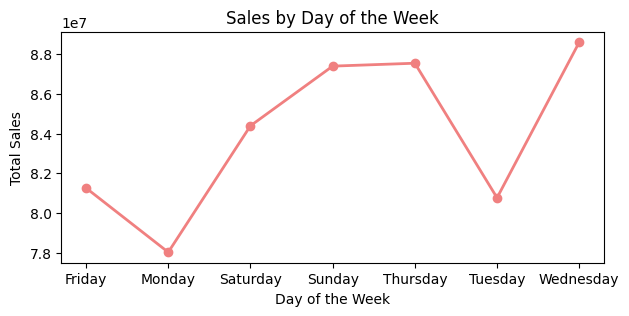

In [14]:
# Grouping by day of the week
day_sales = df1.groupby('day')['total_sales'].sum()

plt.figure(figsize=(7, 3))
day_sales.plot(kind='line', color='lightcoral', marker='o', linewidth=2)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()


In [42]:
daily_sales = df1.groupby('day')['total_sales'].sum().reset_index()
daily_sales

,day,total_sales
0,Friday,81260786.0
1,Monday,78033351.0
2,Saturday,84386820.0
3,Sunday,87386338.0
4,Thursday,87532223.0
5,Tuesday,80768238.0
6,Wednesday,88587521.0


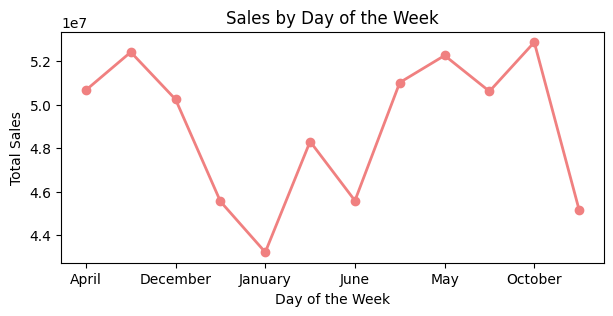

In [15]:
daily_sales = df1.groupby('day')['total_sales'].sum()
plt.figure(figsize=(7, 3))
monthly_sales.plot(kind='line', color='lightcoral', marker='o', linewidth=2)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()

In [16]:
yearly_sales = df1.groupby('month')['total_sales'].sum()

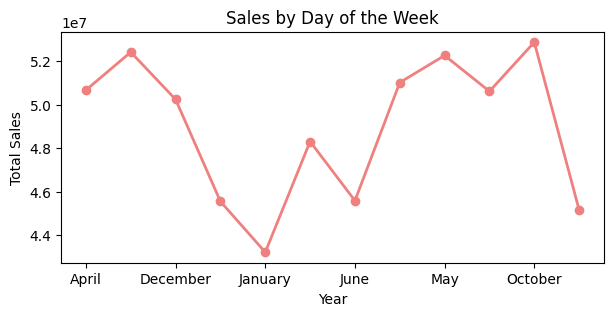

In [17]:
plt.figure(figsize=(7, 3))
yearly_sales.plot(kind='line', color='lightcoral', marker='o', linewidth=2)
plt.title('Sales by Day of the Week')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()

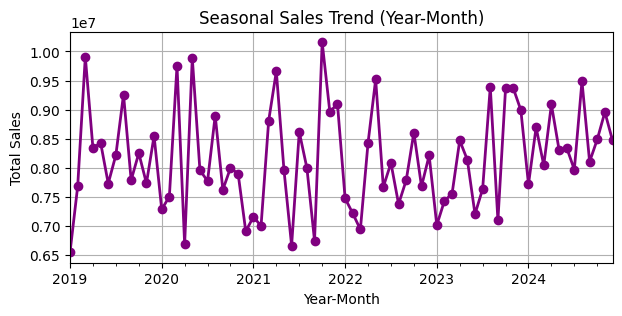

In [18]:
df1['year_month'] = df1['date'].dt.to_period('M')
seasonal_sales = df1.groupby('year_month')['total_sales'].sum()

plt.figure(figsize=(7,3 ))
seasonal_sales.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Seasonal Sales Trend (Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### What product had the most sales?

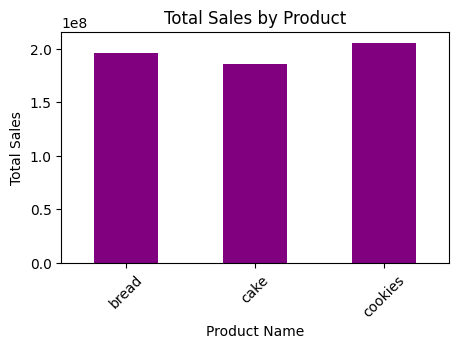

In [19]:
product_sales = df1.groupby('product_name')['total_sales'].sum()
plt.figure(figsize=(5, 3))
product_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

### Are specific products more seasonal in demand?

In [20]:
seasonality_product = df1.groupby(['month', 'product_name'])['total_sales'].sum().unstack()
seasonality_product


product_name,bread,cake,cookies
month,,,
April,16447476.0,18276204.0,15949494.0
August,21150207.0,13807798.0,17462099.0
December,18759796.0,16773284.0,14709759.0
February,14056237.0,15410674.0,16086376.0
January,13848584.0,14115020.0,15256858.0
July,14000628.0,15186217.0,19123715.0
June,16100983.0,14113987.0,15375387.0
March,16888910.0,18037541.0,16095577.0
May,20116794.0,12416959.0,19730979.0


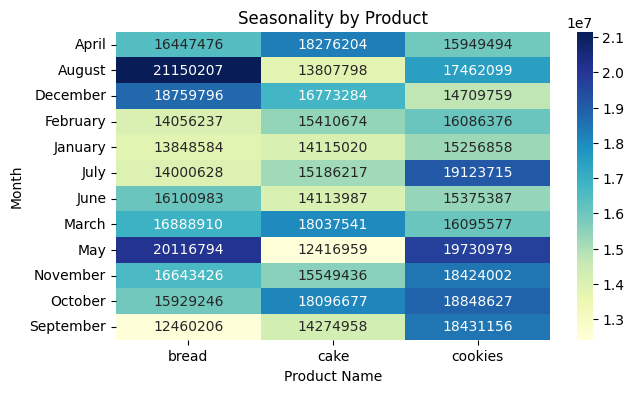

In [21]:
plt.figure(figsize=(7, 4))
sns.heatmap(seasonality_product, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Seasonality by Product')
plt.xlabel('Product Name')
plt.ylabel('Month')
plt.show()

###  How does sales performance compare across different month and years?

In [22]:
monthly_comparison = df1.groupby(['month', 
                                  'product_name'])['total_sales'].sum().unstack()
monthly_comparison

product_name,bread,cake,cookies
month,,,
April,16447476.0,18276204.0,15949494.0
August,21150207.0,13807798.0,17462099.0
December,18759796.0,16773284.0,14709759.0
February,14056237.0,15410674.0,16086376.0
January,13848584.0,14115020.0,15256858.0
July,14000628.0,15186217.0,19123715.0
June,16100983.0,14113987.0,15375387.0
March,16888910.0,18037541.0,16095577.0
May,20116794.0,12416959.0,19730979.0


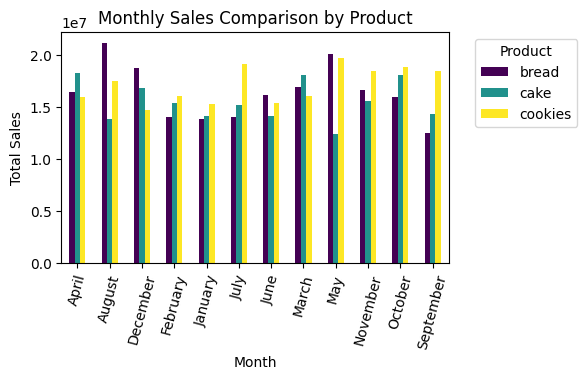

In [23]:
monthly_comparison.plot(kind='bar', figsize=(5, 3), colormap='viridis')
plt.title('Monthly Sales Comparison by Product')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [24]:
yearly_comparison = df1.groupby(['year', 
                                 'product_name'])['total_sales'].sum().unstack()
yearly_comparison

product_name,bread,cake,cookies
year,,,
2019,29236016.0,34296570.0,34933089.0
2020,34095307.0,33419616.0,28692430.0
2021,35463051.0,27105842.0,36293647.0
2022,29441847.0,31539325.0,34047334.0
2023,36696033.0,26860089.0,34134860.0
2024,31470239.0,32837313.0,37392669.0


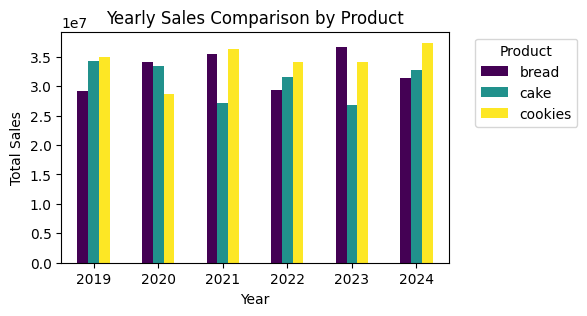

In [25]:
yearly_comparison.plot(kind='bar', figsize=(5, 3), colormap='viridis')
plt.title('Yearly Sales Comparison by Product')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Are there correlations between sales and
### weather, promotions,discounts and customer rating?

promotion and discount are strongly correlated (0.914),

indicating they are often used together in sales campaigns

but both have weak positive relationship with total sales

In [26]:
# Compute correlation matrix
cor_matrix = df1[['total_sales', 'weather',
                          'promotion', 'discount',
                          'customer_rating']].corr()
cor_matrix

,total_sales,weather,promotion,discount,customer_rating
total_sales,1.000000,0.010992,0.013326,0.017849,0.003012
weather,0.010992,1.000000,0.033809,0.023474,-0.016196
promotion,0.013326,0.033809,1.000000,0.914158,0.030245
discount,0.017849,0.023474,0.914158,1.000000,0.046762
customer_rating,0.003012,-0.016196,0.030245,0.046762,1.000000


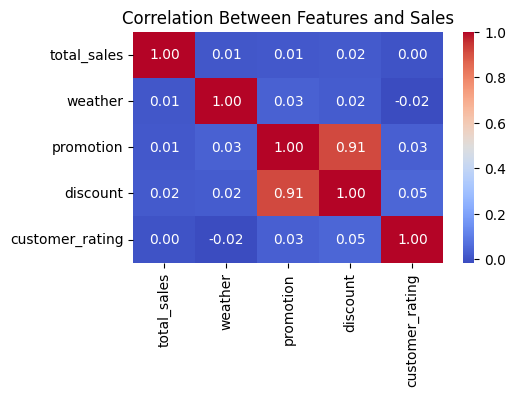

In [27]:
# Heatmap for correlations
plt.figure(figsize=(5, 3))
sns.heatmap(cor_matrix, 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features and Sales')
plt.show()

###  Pricing and Cost Analysis 

### Key Insights

- **Sales Price is the Strongest Predictor of Net Profit:**  
  The strongest correlation with net profit (0.610162) is from sales price. This highlights the importance of pricing strategies for profitability.

- **Overhead Costs Have Minimal Impact on Net Profit:**  
  With a weak correlation (0.065972), overhead costs appear to have negligible influence on profitability, suggesting efficiency in overhead spending.

- **Product Cost Drives Sales Price:**  
  The high correlation (0.964742) between product cost and sales price indicates that cost-based pricing strategies are being used.

- **Moderate Influence of Product Cost on Net Profit:**  
  The correlation (0.432229) between product cost and net profit suggests that higher product costs may lead to increased profits, likely through higher pricing.

In [28]:
# Calculate additional metrics
df1['profit_margin (%)'] = (df1['net_profit'] / df1['total_sales']) * 100
df1['costsales_ratio'] = (df1['product_cost'] + df1['overhead_costs']) / df1['sales_price']
df1['pricecost_ratio'] = df1['sales_price'] / df1['product_cost']

In [29]:
# 1. Compare Product Costs, Sales Prices, Overhead Costs, and Net Profits using a correlation heatmap
corr_matrix = df1[['product_cost', 'sales_price', 'overhead_costs', 'net_profit']].corr()
corr_matrix

,product_cost,sales_price,overhead_costs,net_profit
product_cost,1.000000,0.964742,0.622103,0.432229
sales_price,0.964742,1.000000,0.594894,0.610162
overhead_costs,0.622103,0.594894,1.000000,0.065972
net_profit,0.432229,0.610162,0.065972,1.000000


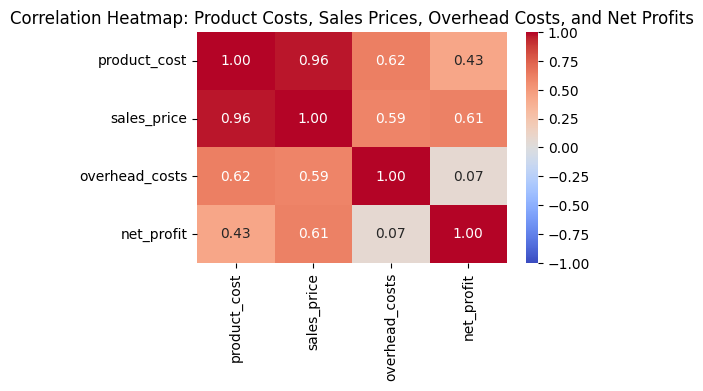

In [30]:
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Product Costs, Sales Prices, Overhead Costs, and Net Profits')
plt.show()

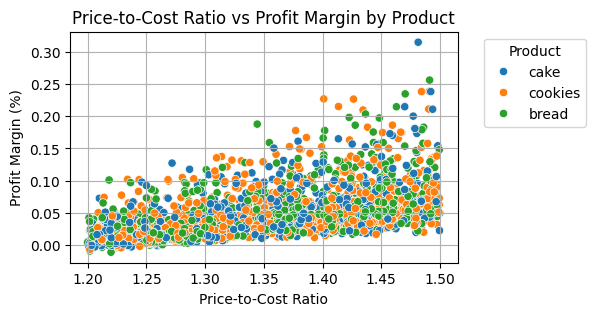

In [31]:
# 2. Plotting Price-to-Cost Ratio vs Profit Margin for each product
plt.figure(figsize=(5, 3))
sns.scatterplot(x='pricecost_ratio', y='profit_margin (%)', 
                data=df1, hue='product_name', palette='tab10')
plt.title('Price-to-Cost Ratio vs Profit Margin by Product')
plt.xlabel('Price-to-Cost Ratio')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Weather Impact on Sales(Temperature of the Day)

In [32]:
# Rename the wether column to temperature
df1.rename(columns = {'weather':'temperature'},inplace = True)

In [33]:
# Check correlation between weather and total sales
correlation = df1[['temperature', 'total_sales']].corr()
correlation

,temperature,total_sales
temperature,1.000000,0.010992
total_sales,0.010992,1.000000


In [34]:
df1['temperature'] = df1['temperature'].round()
temp_sales = df1.groupby('temperature')['total_sales'].mean().reset_index()
temp_sales

,temperature,total_sales
0,24.0,282041.216667
1,25.0,299195.071749
2,26.0,307344.462500
3,27.0,297925.168000
4,28.0,300573.117886
5,29.0,301951.954918
6,30.0,297097.896414
7,31.0,307602.185345
8,32.0,297995.581699


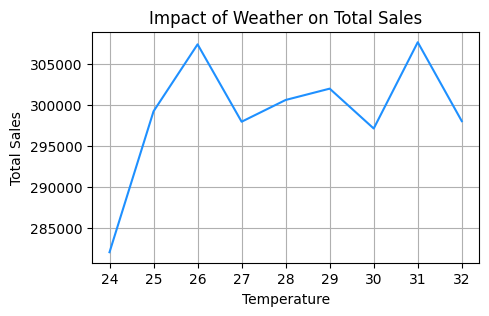

In [35]:
plt.figure(figsize=(5, 3))
sns.lineplot(temp_sales, x='temperature', y='total_sales', color='dodgerblue')
plt.title('Impact of Weather on Total Sales')
plt.xlabel('Temperature')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

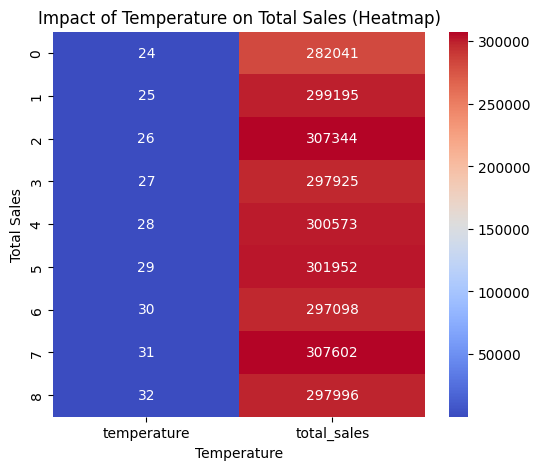

In [36]:
# Plotting the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(temp_sales, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Impact of Temperature on Total Sales (Heatmap)')
plt.xlabel('Temperature')
plt.ylabel('Total Sales')
plt.show()

In [37]:
temp_sales_sorted = temp_sales.sort_values(by='total_sales', ascending=False)
temp_sales_sorted.head(8)

,temperature,total_sales
7,31.0,307602.185345
2,26.0,307344.462500
5,29.0,301951.954918
4,28.0,300573.117886
1,25.0,299195.071749
8,32.0,297995.581699
3,27.0,297925.168000
6,30.0,297097.896414


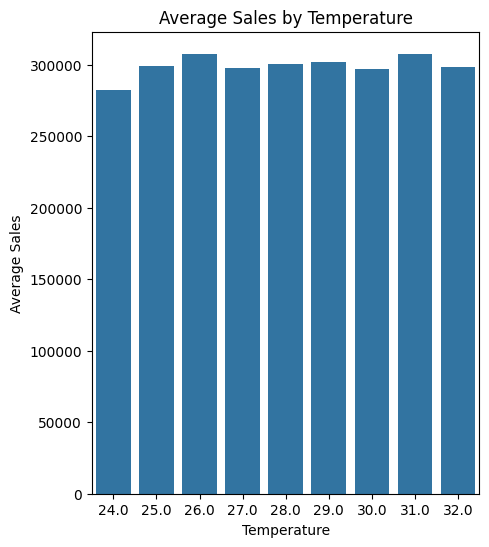

In [38]:
plt.figure(figsize=(5, 6))
sns.barplot(data=temp_sales_sorted, x='temperature', y='total_sales')
plt.title('Average Sales by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Sales')
plt.show()

In [39]:
# Group by product and weather to calculate total sales
product_sales_temp = df1.groupby(['product_name', 'temperature'])['total_sales'].mean().reset_index()
product_sales_temp

,product_name,temperature,total_sales
0,bread,24.0,263980.428571
1,bread,25.0,291608.328947
2,bread,26.0,309073.306818
3,bread,27.0,294649.888889
4,bread,28.0,305208.759036
5,bread,29.0,308085.628205
6,bread,30.0,304636.129870
7,bread,31.0,301679.460526
8,bread,32.0,302599.314815
9,cake,24.0,296819.950000


In [40]:
# Pivot the data to create a matrix of total sales
product_weather_pivot = product_weather_sales.pivot(index='product_name',
                                                    columns='temperature', values='total_sales')
product_weather_pivot

NameError: name 'product_weather_sales' is not defined

In [ ]:
plt.figure(figsize=(6,3))
product_weather_pivot.plot(kind='bar', stacked=True, cmap='coolwarm')

plt.title('Impact of Weather on Product Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Promotions and Discounts Effect on Sales

In [ ]:
# Group data by whether promotion was applied or not
promotion_sales = df1.groupby('promotion')['total_sales'].mean().reset_index()
promotion_sales


In [ ]:
# Plotting the impact of promotions on total sales
plt.figure(figsize=(2, 4))
promotion_sales.plot(kind='bar')
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion Applied (0 = No, 1 = Yes)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

### Effect of Discount on Sales

In [ ]:
df1['discounted_sales'] = df1['total_sales'].where(df1['discount'] > 0, 0)
df1['non_discounted_sales'] = df1['total_sales'].where(df1['discount'] == 0, 0)

In [ ]:
# Group data by year for discounted and non-discounted sales
monthly_sales = df1.groupby('year')[['discounted_sales', 'non_discounted_sales']].sum()
monthly_sales 

In [ ]:
# Plot with different colors for each line
plt.figure(figsize=(6, 3))
plt.plot(monthly_sales.index, monthly_sales['discounted_sales'],
         marker='o', label='Discounted Sales', color='blue')
plt.plot(monthly_sales.index, monthly_sales['non_discounted_sales'],
         marker='o', label='Non-Discounted Sales', color='yellow')
plt.title('Yearly Sales: Discounted vs Non-Discounted')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
df_2024 = df1[df1['year'] == 2024]

monthly_sales_2024= df_2024.groupby('month')[['discounted_sales', 'non_discounted_sales']].sum()
monthly_sales_2024

In [ ]:
monthly_sales_2024.index = pd.Categorical(monthly_sales_2024.index, 
                                          categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)
monthly_sales_2024 = monthly_sales_2024.sort_index()

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(monthly_sales_2024.index, monthly_sales_2019['discounted_sales'], marker='o', label='Discounted Sales', color='blue')
plt.plot(monthly_sales_2024.index, monthly_sales_2019['non_discounted_sales'], marker='o', label='Non-Discounted Sales', color='yellow')
plt.title('Monthly Sales in 2024: Discounted vs Non-Discounted')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

### Product Profitability Analysis

In [43]:
product_profit = df1.groupby('product_name')[['net_profit',
                                              'profit_margin (%)']].mean()
product_profit

,net_profit,profit_margin (%)
product_name,,
bread,123.077721,0.049958
cake,117.949894,0.047027
cookies,122.436322,0.050177


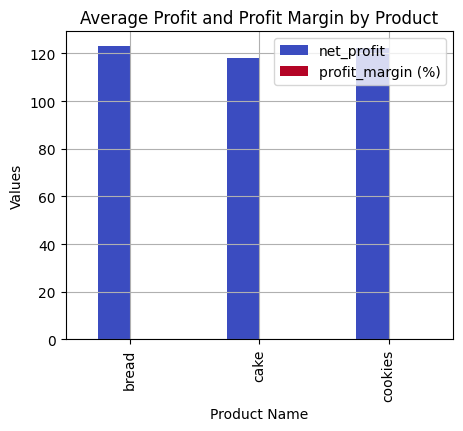

In [44]:
product_profit.plot(kind='bar', figsize=(5, 4), colormap='coolwarm')
plt.title('Average Profit and Profit Margin by Product')
plt.ylabel('Values')
plt.xlabel('Product Name')
plt.grid()
plt.show()

In [46]:
promotion_sales = df1.groupby('promotion')['total_sales'].mean().reset_index()
promotion_sales

,promotion,total_sales
0,0,298599.838250
1,1,301671.758197


In [47]:
df1['discounted_sales'] = df1['total_sales'].where(df1['discount'] > 0, 0)
df1['non_discounted_sales'] = df1['total_sales'].where(df1['discount'] == 0, 0)

yearly_sales = df1.groupby('year')[['discounted_sales', 'non_discounted_sales']].sum().reset_index()
yearly_sales


,year,discounted_sales,non_discounted_sales
0,2019,44053745.0,54411930.0
1,2020,51195104.0,45012249.0
2,2021,50505591.0,48356949.0
3,2022,49803742.0,45224764.0
4,2023,46511062.0,51179920.0
5,2024,52362392.0,49337829.0
